# Data Analysis for Nursing Home Palliative AI Uses

## Necessary Set-Up

In [1]:
import os
import pandas as pd
import collections
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pycountry_convert as pc
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud
from textblob import TextBlob
import re
from collections import Counter
import seaborn as sns

In [2]:
# define variables for file names and paths
PARSIFAL = "data_extraction.xls"
ZOTERO = "data_extraction_zotero.csv"
WORKING_DIRECTORY = os.getcwd() + '/'

if not os.path.isdir("graphs"):
    os.mkdir("graphs")

In [3]:
# import parsifal data
parsifal_df = pd.read_excel(WORKING_DIRECTORY + PARSIFAL)
# import and clean zotero data
zotero_df = pd.read_csv(WORKING_DIRECTORY + ZOTERO)
zotero_df["Publication or Conference Title"] = zotero_df["Publication Title"].fillna(zotero_df["Conference Name"])
zotero_df = zotero_df.drop(["Key", "Publication Title", "ISBN", "ISSN", "DOI", "Url", "Date","Date Added","Date Modified","Access Date","Pages","Num Pages","Issue","Volume","Number Of Volumes","Journal Abbreviation","Short Title","Series","Series Number","Series Text","Series Title", "Publisher" ,"Place","Language","Rights","Type", "Archive","Archive Location","Library Catalog","Call Number","Extra","Notes","File Attachments","Link Attachments","Manual Tags","Automatic Tags","Editor","Series Editor","Translator","Contributor","Attorney Agent","Book Author","Cast Member","Commenter","Composer","Cosponsor","Counsel","Interviewer","Producer","Recipient","Reviewed Author","Scriptwriter","Words By","Guest","Number","Edition","Running Time","Scale","Medium","Artwork Size","Filing Date","Application Number","Assignee","Issuing Authority","Country","Meeting Name", "Conference Name" ,"Court","References","Reporter","Legal Status","Priority Numbers","Programming Language","Version","System","Code","Code Number","Section","Session","Committee","History","Legislative Body"], axis=1)


## A - Author Analysis

### A - Findings
- No repeated authors were found across publications. 
- This indicates that these types of palliative interventions describe a relatively new field with few experts. 

In [4]:
# get a list of all authors noted in all articles using two different sources (zotero and parsifal data extraction form)
authors_list_a = parsifal_df["Authors"].to_list()
authors_list_b = zotero_df["Author"].to_list()

# separate all authors into individual list items
seperated_authors_a = []
seperated_authors_b = []

for i in range(len(authors_list_a)):
    temp = authors_list_a[i].split(' and ')
    for i in range(len(temp)):
        temp[i] = temp[i].replace("\xa0", " ")
        seperated_authors_a.append(temp[i].strip())

for i in range(len(authors_list_b)):
    temp = authors_list_b[i].split(';')
    for i in range(len(temp)):
        seperated_authors_b.append(temp[i].strip())
seperated_authors_a

# check for duplicate authors across all publications in the seperated list items
print('Duplicate test A: ', len([item for item, count in collections.Counter(seperated_authors_a).items() if count > 1]))
print('Duplicate test B: ', len([item for item, count in collections.Counter(seperated_authors_b).items() if count > 1]))

Duplicate test A:  0
Duplicate test B:  0


## B - Publication Year Analysis

### B - Findings
- The majority of the material was published during the COVID-19 pandemic.
- 2021 was the most prolific year for authors in the field. 
- Interest in 2024 is rising again. 

In [5]:
publication_years = parsifal_df["Year"].to_list()
year_frequency = collections.Counter(publication_years)
year_frequency = sorted(year_frequency.items())
year_frequency = dict(year_frequency)
year_frequency

{2019: 3, 2020: 3, 2021: 6, 2022: 3, 2023: 1, 2024: 2}

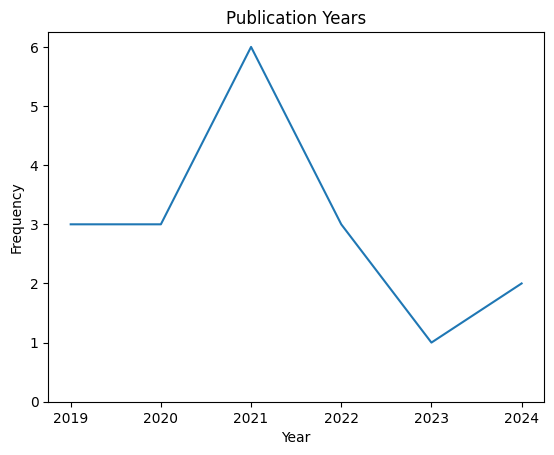

In [6]:
ax = plt.figure().gca()
ax.plot(year_frequency.keys(), year_frequency.values())
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim(0)
plt.title("Publication Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.savefig("./graphs/publicationYears.png", bbox_inches='tight')
plt.show();

## C - Research Location Analysis

### C - Findings
- Research is primarily focused in Europe.
- Germany and the UK are prolific European countries.
- Japan and Australia also quite prolific.
- No African or South American representation.

In [7]:
# country analysis
temp_countries = parsifal_df["Country"]
countries = []
for i in range(len(temp_countries)):
    temp = temp_countries[i].split(' and ')
    for i in range(len(temp)):
        if temp[i] == "usa":
            countries.append("USA")
        elif temp[i] == "uk":
            countries.append("United Kingdom")
        else:
            temp[i] = temp[i].title()
            countries.append(temp[i].strip())

countries = sorted((collections.Counter(countries)).items())
# country_names = countries.keys()
# country_freq = list(countries.values())
ones = [item for item, count in countries if count == 1]
twos = [item for item, count in countries if count == 2]
threes = [item for item, count in countries if count == 3]

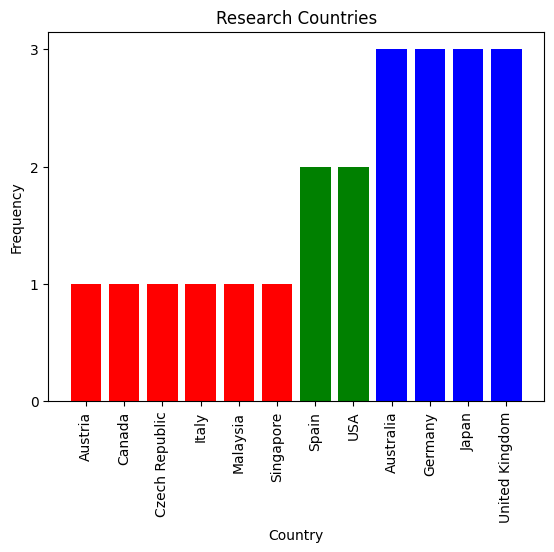

In [8]:
ax = plt.figure().gca()
ax.bar(ones, np.full(len(ones), 1), color = 'red')
ax.bar(twos, np.full(len(twos), 2), color = 'green')
ax.bar(threes, np.full(len(threes), 3), color = 'blue')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.ylim(0)
plt.title("Research Countries")
plt.ylabel("Frequency")
plt.xlabel("Country")
plt.savefig("./graphs/researchCountries.png", bbox_inches='tight')
plt.show();

In [9]:
# continent analysis
def country_to_continent(country):
    temp_alpha2 = pc.country_name_to_country_alpha2(country)
    temp_continent_code = pc.country_alpha2_to_continent_code(temp_alpha2)
    continent = pc.convert_continent_code_to_continent_name(temp_continent_code)
    return continent

In [10]:
continents = {}
for country in countries:
    try:
        continents[country_to_continent(country[0])] += country[1]
    except:
        continents[country_to_continent(country[0])] = country[1]

continents


/Users/isabel/anaconda3/envs/review/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Users/isabel/anaconda3/envs/review/lib/python3.12/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


{'Oceania': 3, 'Europe': 11, 'North America': 3, 'Asia': 5}

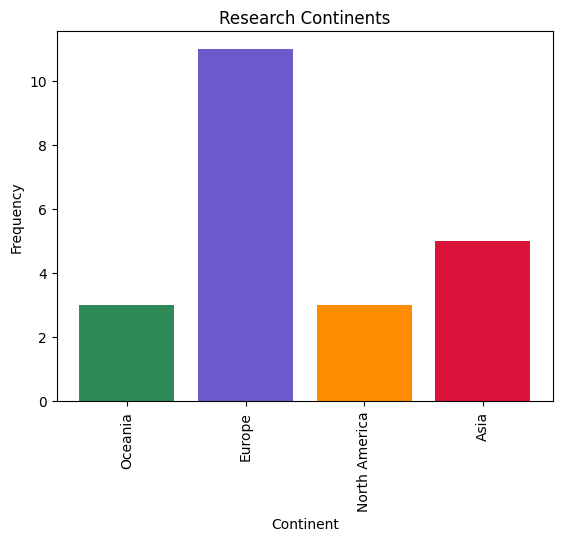

In [11]:
ax = plt.figure().gca()
ax.bar(continents.keys(), continents.values(), color = ['seagreen', 'slateblue', 'darkorange' ,'crimson'])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=90)
plt.ylim(0)
plt.title("Research Continents")
plt.ylabel("Frequency")
plt.xlabel("Continent")
plt.savefig("./graphs/researchContinents.png", bbox_inches='tight')
plt.show();

## D - Abstract Analysis

### D - Findings 
- Words like 'care', 'robot', and 'use' are common, emphasising the hands-on approach to palliative care found in many studies. 

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/isabel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/isabel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# abstract text
abstract_text = zotero_df["Abstract Note"].apply(lambda row: ''.join(row)).str.cat(sep=' ')

# tokenization
tokens = word_tokenize(abstract_text)

# removing stopwords and stemming
stop_words = set(stopwords.words('english'))
cleaned_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.lower() not in string.punctuation and not re.match(r'^-?\d+(?:\.\d+)?$', word.lower())]

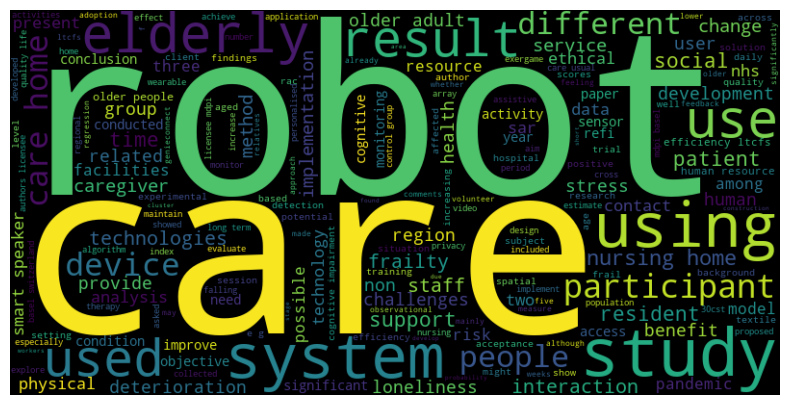

In [14]:
# create a word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(cleaned_tokens))

# display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("./graphs/abstractWordCloud.png", bbox_inches='tight', pad_inches=0)
plt.show();

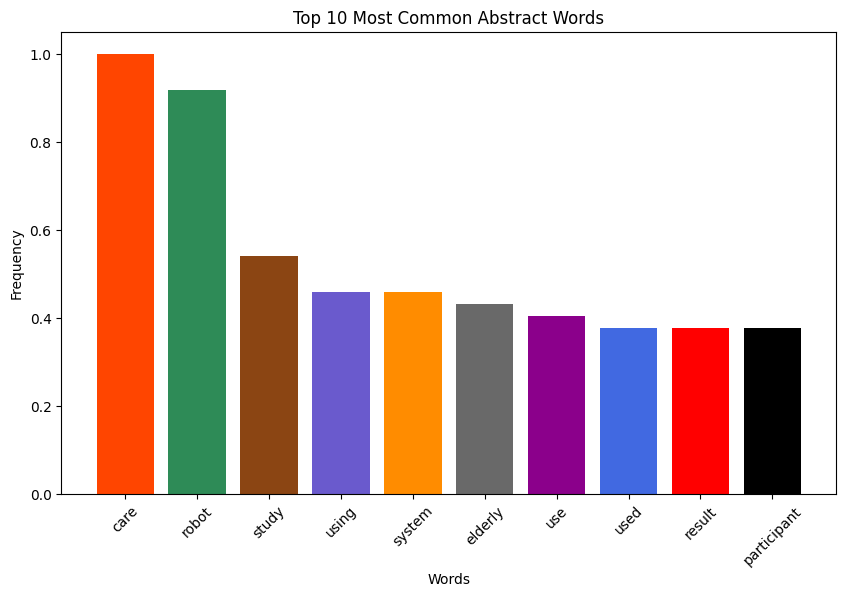

In [15]:
# plotting
plt.figure(figsize=(10, 6))
plt.bar(list(wordcloud.words_.keys())[:10], list(wordcloud.words_.values())[:10], color=['orangered', 'seagreen', "saddlebrown", 'slateblue', 'darkorange' , "dimgrey", "darkmagenta",'royalblue', "red", "black" ])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Abstract Words')
plt.xticks(rotation=45)
plt.savefig("./graphs/abstractBarChart.png", bbox_inches='tight')
plt.show();

In [16]:
def analyse_sentiment(text):
    # sentiment analysis
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity

    if sentiment > 0:
        return "positive sentiment"
    elif sentiment < 0:
        return "negative sentiment"
    else:
        return "neutral sentiment"

In [17]:
# overall sentiment across abstracts
print(analyse_sentiment(abstract_text))
# each abstract analysed individually
positive = 0
negative = 0
neutral = 0
for abstract in zotero_df["Abstract Note"]:
    if analyse_sentiment(abstract) == "positive sentiment":
        positive += 1
    elif analyse_sentiment(abstract) == "negative sentiment":
        negative += 1
    else:
        neutral += 1
abstract_sentiments = {"positive": positive, "negative":negative, "neutral":neutral}
abstract_sentiments

positive sentiment


{'positive': 16, 'negative': 2, 'neutral': 0}

## E - Type of Publication

### E - Findings
- Most of the publications reviewed fell into the category of Original Research.

{'Case Study': 1, 'Methodology or Methods': 1, 'Original Research': 16}


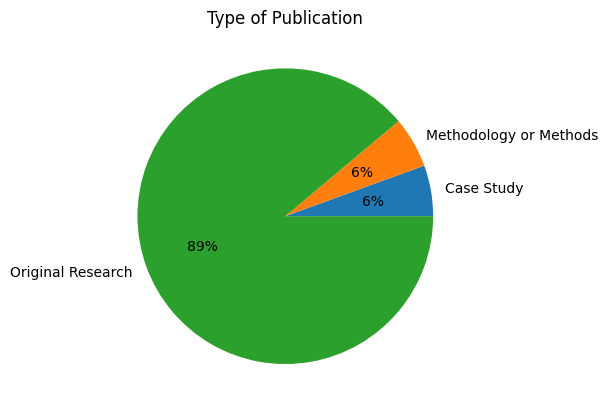

In [18]:
publication_type = dict(Counter(parsifal_df['Type of Publication']))
publication_type['Original Research'] = publication_type['Original Research (Introduction, Methods, Results, Discussion)']
del publication_type['Original Research (Introduction, Methods, Results, Discussion)']
print(publication_type)
plt.pie(publication_type.values(), labels=publication_type.keys(), autopct='%1.0f%%')
# plt.bar(publication_type.keys(), publication_type.values(), 
plt.title("Type of Publication")
plt.savefig("./graphs/typeOfPublicationPieChart.png", bbox_inches='tight')
plt.show();

## F - Types of Hardware

### F - Findings
- Sensors, robots, and pre-existing smart devices played key roles in many studies. 

In [19]:
def remove_and(pandas_series, normal_run = True):
    temp_list = []
    if normal_run:
        for item in pandas_series:
            temp_item = re.split('and |, |\n', item)
            for temp in temp_item:
                temp = temp.strip()
                if "sensor" in temp:
                    temp_list.append("Sensor")
                elif "SPSS" in temp:
                    temp_list.append("SPSS")
                elif "CARESSES" in temp:
                    temp_list.append("CARESSES")
                elif "not applicable" in temp:
                    temp_list.append("Not Discussed")
                else:
                    temp_list.append(temp.title())
        return temp_list
    else:
        for item in pandas_series:
            temp_item = re.split(', |\n', item)
            for temp in temp_item:
                temp_list.append(temp.title())
        return temp_list

{'Sensor': 8, 'Socially Assistive Robots': 6, 'Not Discussed': 3, 'Smartphone': 2, 'Smart Speaker': 2, 'Cycle Ergometer': 1, 'Smart Textile': 1, 'Camera': 1, 'Computer': 1}


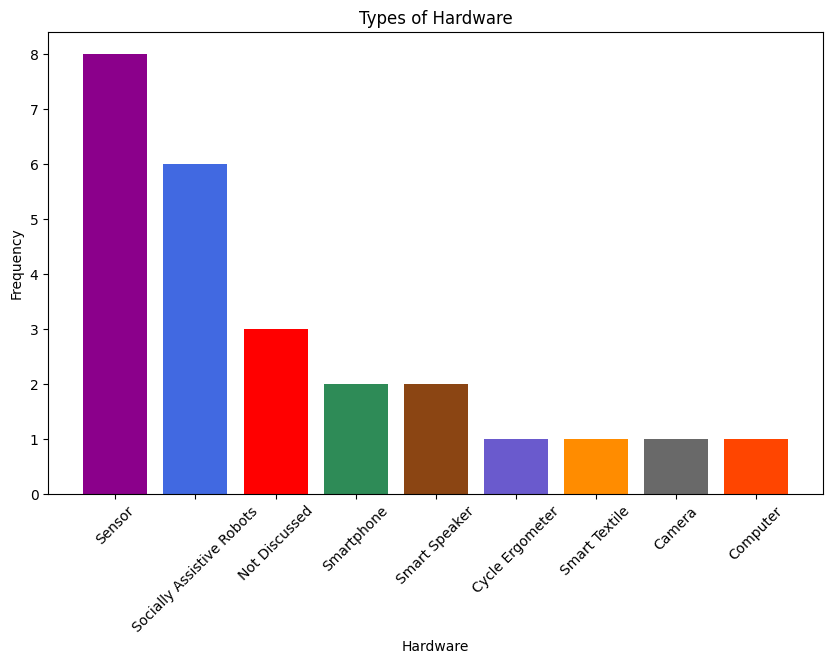

In [20]:

hardware = remove_and(parsifal_df['Hardware'])
hardware = dict(Counter(hardware))
hardware = dict(sorted(hardware.items(), key=lambda item: item[1], reverse=True))
print(hardware)
plt.figure(figsize=(10, 6))
plt.bar(hardware.keys(), hardware.values(), color=["darkmagenta",'royalblue', "red", 'seagreen', "saddlebrown", 'slateblue', 'darkorange' , "dimgrey", 'orangered' ])
plt.xlabel('Hardware')
plt.ylabel('Frequency')
plt.title('Types of Hardware')
plt.xticks(rotation=45)
plt.savefig("./graphs/hardwareBarChart.png", bbox_inches='tight')
plt.show();

## G - Types of Software

### G - Findings
- Many studies do not discuss the software used in the creation of their interventions; for many studies, there was an emphasis on pre-existing technology. 
- Some discussed the use of Excel and SPSS for data collection, synthesis, and/or analysis. 
- Few mentioned the use of software designed specifically for palliative care. 

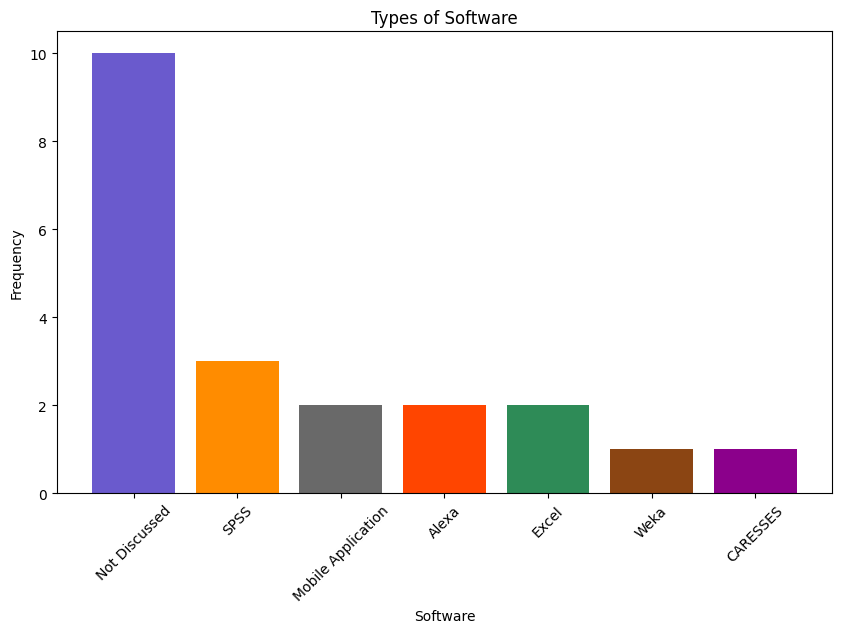

In [21]:
software = remove_and(parsifal_df['Software'])
software = dict(Counter(software))
software = dict(sorted(software.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(software.keys(), software.values(), color=['slateblue', 'darkorange' , "dimgrey", 'orangered', 'seagreen', "saddlebrown", "darkmagenta",'royalblue', "red"])
plt.xlabel('Software')
plt.ylabel('Frequency')
plt.title('Types of Software')
plt.xticks(rotation=45)
plt.savefig("./graphs/softwareBarChart.png", bbox_inches='tight')
plt.show();

## H - Outcomes

### H - Findings
- Many studies focused on alleviating loneliness, deterioration detection, or generic well-being improvement. 
- None focused on a pre-defined or concrete idea of palliative care. 

{'Alleviating Loneliness': 7, 'Deterioration Detection': 6, 'Well-Being Improvement': 5, 'Improved Cognitive Skills': 2, 'Stress Detection': 1, 'Cognitive Assessment': 1, 'Increasing Independence': 1, 'Resident Perspective Tool': 1}


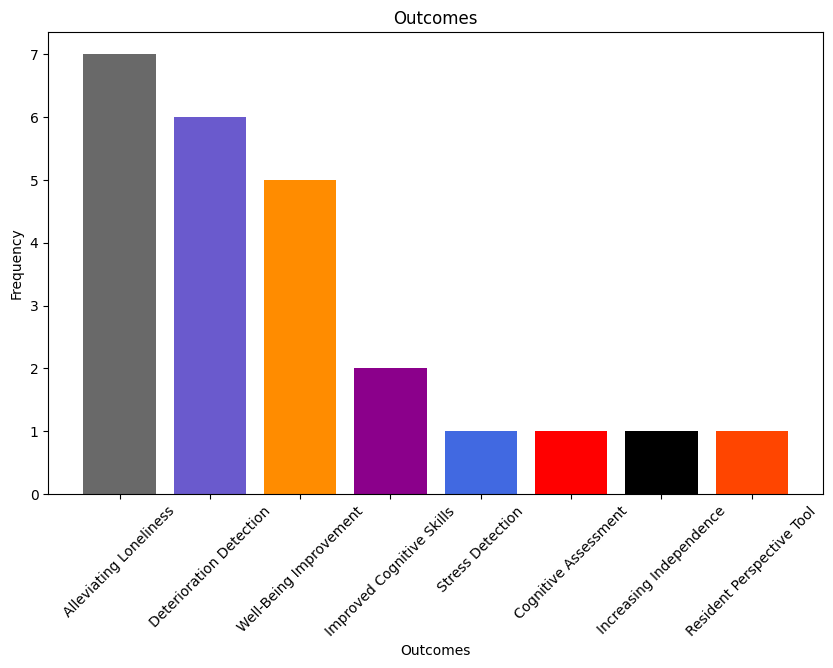

In [22]:
outcomes = dict(Counter(remove_and(parsifal_df["Outcomes"])))
outcomes = dict(sorted(outcomes.items(), key=lambda item: item[1], reverse=True))
print(outcomes)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(outcomes.keys(), outcomes.values(), color=[ "dimgrey",'slateblue', 'darkorange' , "darkmagenta",'royalblue', "red", "black", 'orangered', 'seagreen', "saddlebrown"  ])
plt.xlabel('Outcomes')
plt.ylabel('Frequency')
plt.title('Outcomes')
plt.xticks(rotation=45)
plt.savefig("./graphs/outcomesBarChart.png", bbox_inches='tight')
plt.show();

## I - AI Application Area

### I - Findings 
- Many papers were focused on the creation of components for an expert system; there is emphasis placed on developing decision technologies. 
- Robotics and smart devices also played an important role in many publications, with emphasis placed on entertainment and its benefits. 
- A handful of both robotic and expert systems made use of computer vision also. 

{'Expert Systems': 9, 'Robotics': 6, 'Smart Appliances': 3}


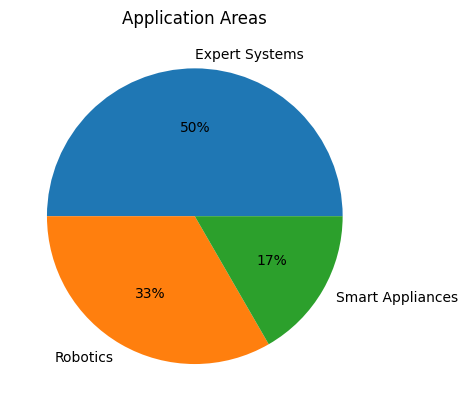

In [23]:
application_area = dict(Counter(remove_and(parsifal_df["Application Area"])))
application_area['Smart Appliances'] = application_area['Other']
del application_area['Other']
del application_area['Computer Vision']
print(application_area)
plt.pie(application_area.values(), labels=application_area.keys(), autopct='%1.0f%%')
plt.title('Application Areas')
plt.savefig("./graphs/applicationAreaPieChart.png", bbox_inches='tight')
plt.show();

## J - AI/ML Overview

### J - Findings
- Primarily supervised machine learning was used. 
- Many studies did not discuss ML Algorithms, but of those that did, Regression models and Neural Networks were the most common.
- Overall, a wide variety of different techniques were used to both create solutions and analyse data. 
- Voice and touch were used as input for many AI solutions (this is explained by a heavy emphasis on robotics, smart speakers, and other pre-existing devices).
- Sensors, clinical data, and images were also used (primarily in expert systems). 


{'Supervised': 8, 'Supervised and Unsupervised': 1, 'Not Discussed': 9}


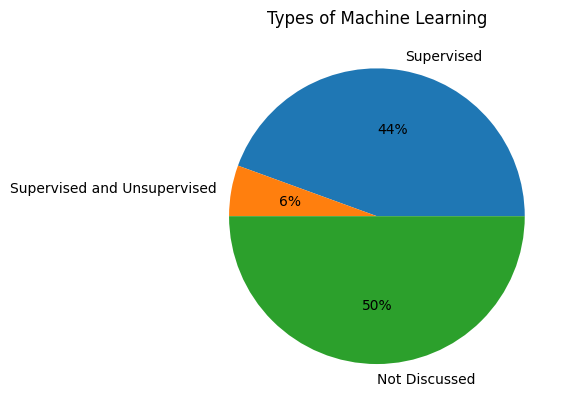

In [24]:
# supervised or unsupervised - types of ML used
ml_type = dict(Counter(parsifal_df["Type of ML Algorithm"]))
ml_type['Supervised and Unsupervised'] = ml_type['Both']
ml_type['Not Discussed'] = ml_type['Not Applicable']
del ml_type['Both']
del ml_type['Not Applicable']

print(ml_type)
plt.pie(ml_type.values(), labels=ml_type.keys(), autopct='%1.0f%%')
plt.title('Types of Machine Learning')
plt.savefig("./graphs/machineLearningTypesPieChart.png", bbox_inches='tight')
plt.show();

{'Not Discussed': 9, 'Logistic Regression': 4, 'Linear Regression': 2, 'Convolutional Neural Network': 2, 'Random Forest': 1, 'Adaboost': 1, 'One-Class Classification': 1, 'Recurrent Neural Network': 1, 'Decision Tree': 1}


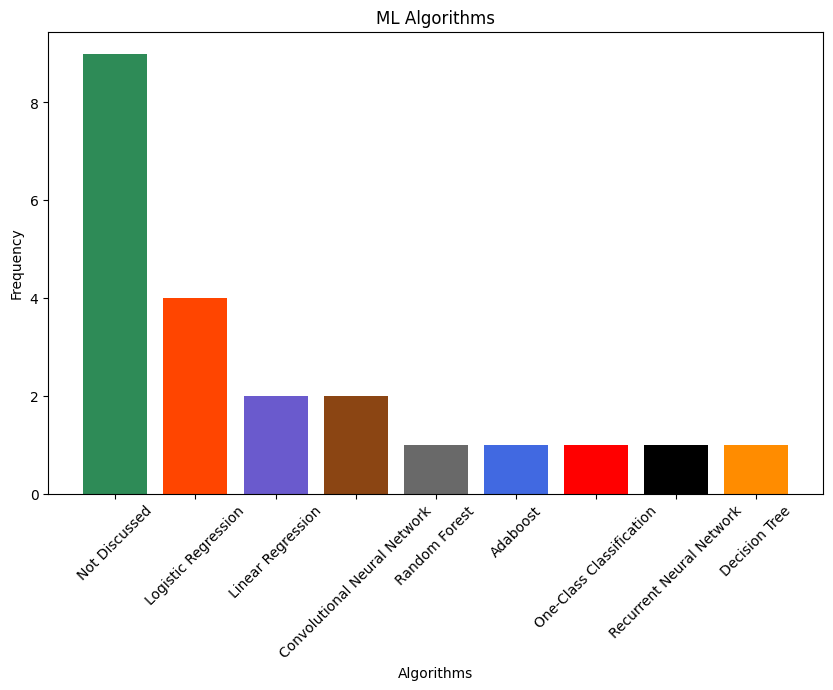

In [25]:
# types of ML algorithm used
ml_algorithms = dict(Counter(remove_and(parsifal_df["Algorithm Details"])))
ml_algorithms = dict(sorted(ml_algorithms.items(), key=lambda item: item[1], reverse=True))
print(ml_algorithms)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_algorithms.keys(), ml_algorithms.values(), color=['seagreen', 'orangered','slateblue', "saddlebrown",   "dimgrey", 'royalblue', "red", "black", 'darkorange' ,"darkmagenta", ])
plt.xlabel('Algorithms')
plt.ylabel('Frequency')
plt.title('ML Algorithms')
plt.xticks(rotation=45)
plt.savefig("./graphs/mlAlgorithmsBarChart.png", bbox_inches='tight')
plt.show();

{'Voice': 7, 'Touch': 6, 'Sensor': 4, 'Clinical Data': 4, 'Image': 4, 'Not Discussed': 1}


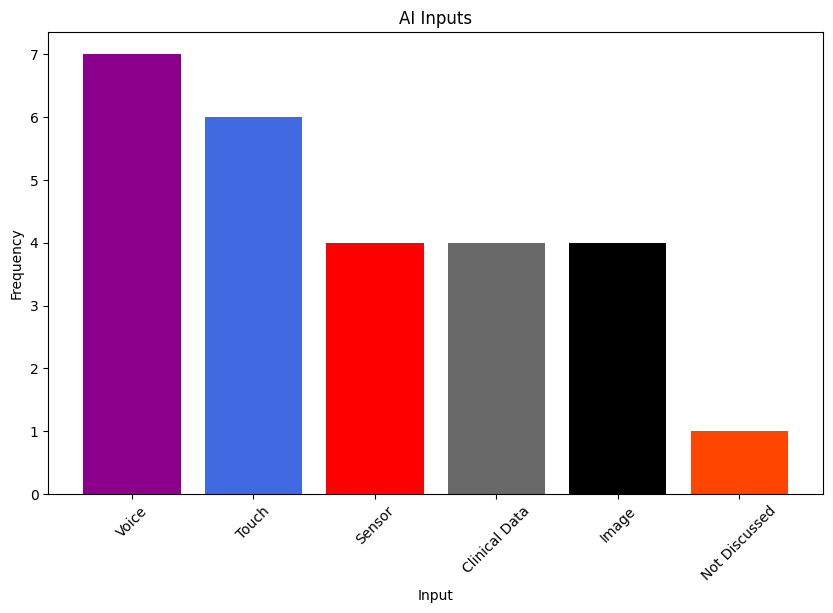

In [26]:
## AI inputs
ml_input = dict(Counter(remove_and(parsifal_df["Input"])))
ml_input = dict(sorted(ml_input.items(), key=lambda item: item[1], reverse=True))
print(ml_input)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_input.keys(), ml_input.values(), color=["darkmagenta",'royalblue', "red", "dimgrey",  "black", 'orangered', 'seagreen', "saddlebrown", 'slateblue',])
plt.xlabel('Input')
plt.ylabel('Frequency')
plt.title('AI Inputs')
plt.xticks(rotation=45)
plt.savefig("./graphs/mlInputBarChart.png", bbox_inches='tight')
plt.show();

{'Audio-Visual Stimuli': 8, 'Fall Risk': 4, 'Frailty Status': 2, 'Stress Classification': 1, 'Deterioration Classification': 1, 'Cognitive Assessment': 1, 'Not Discussed': 1, 'Personalised Recommendations': 1}


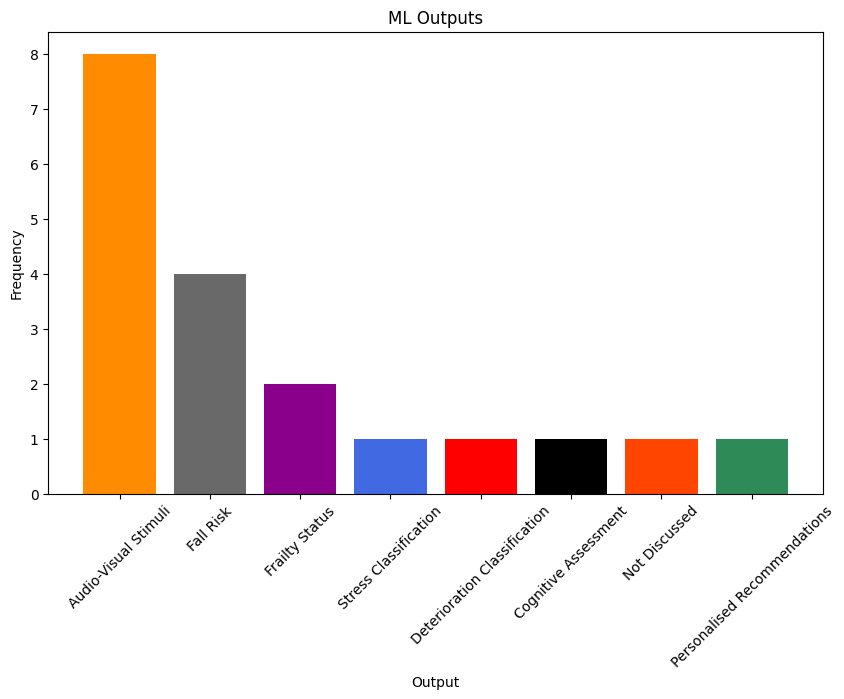

In [27]:
## ml inputs
ml_output = dict(Counter(remove_and(parsifal_df["Output"])))
ml_output = dict(sorted(ml_output.items(), key=lambda item: item[1], reverse=True))
print(ml_output)
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(ml_output.keys(), ml_output.values(), color=['darkorange' , "dimgrey", "darkmagenta",'royalblue', "red", "black", 'orangered', 'seagreen', "saddlebrown", 'slateblue' ])
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.title('ML Outputs')
plt.xticks(rotation=45)
plt.savefig("./graphs/mlOutputBarChart.png", bbox_inches='tight')
plt.show();

## K - End-Users

### K - End-Users
- Expert systems were primarily designed for healthcare professionals.
- Robots were primarily designed for residents. 
- One system was designed for both. 
- One was a study aimed at helping both understand each others attitudes to care robots. 
- Patient feedback was not encorporated into the vast majority of systems, although the majority of studies involved patients in some capacity (i.e. through data generation or testing environments).
- Very few healthcare professionals evaluated systems; many were involved in the selection of residents for testing, but feedback from end-users was often not obtained or discussed. 
- No studies sought to gain feedback from both health professionals and residents within the same study. 


{'Healthcare Professionals': 9, 'Residents': 7, 'Residents and Healthcare Professionals': 2}


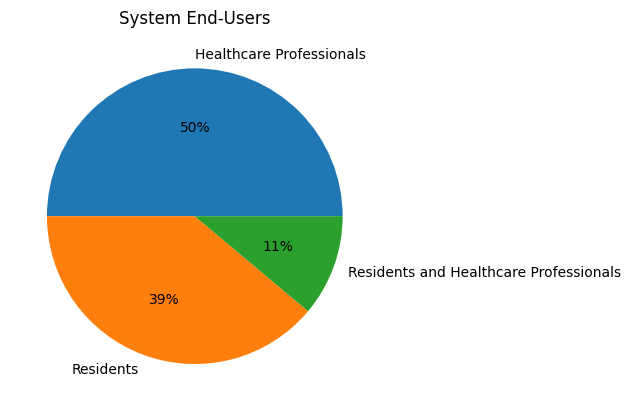

In [28]:
# types of end user
end_user_frequency = dict(Counter(remove_and(parsifal_df["End-Users"], normal_run=False)))
end_user_frequency["Residents and Healthcare Professionals"] = end_user_frequency["Residents And Healthcare Professionals"]
del end_user_frequency['Residents And Healthcare Professionals']
print(end_user_frequency)
plt.pie(end_user_frequency.values(), labels=end_user_frequency.keys(), autopct='%1.0f%%')
plt.title("System End-Users")
plt.savefig("./graphs/endUsersPieChart.png", bbox_inches='tight')
plt.show();

{'Any': 14, 'Frail': 3, 'Cognitively Impaired': 1}


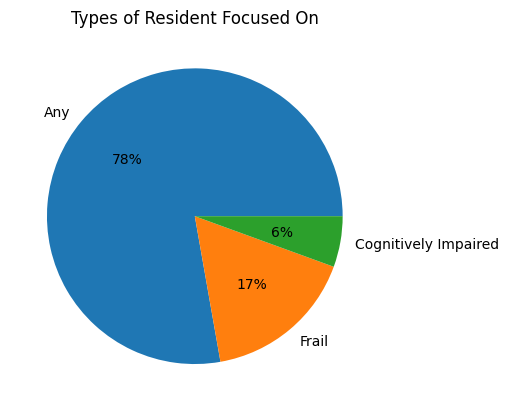

In [29]:
# types of nursing home resident
residents = dict(Counter(remove_and(parsifal_df["Type of Resident"])))
residents = dict(sorted(residents.items(), key=lambda item: item[1], reverse=True))
print(residents)
plt.pie(residents.values(), labels=residents.keys(), autopct='%1.0f%%')
plt.title('Types of Resident Focused On')
plt.savefig("./graphs/typesOfResidentPieChart.png", bbox_inches='tight')
plt.show();

In [30]:
# patient involvement
patient_involvement = dict(Counter(parsifal_df['Patient Involvement']))
print('Patient Involvement: ', patient_involvement)

# how were patients involved?
involved_patients_details = dict(Counter(parsifal_df['Patient Involvement Details']))
print('Patient Involvement Details: ', involved_patients_details)

# what patients were asked for feedback?
patient_feedback = {"Feedback" : involved_patients_details['user experience evaluation'], "No Feedback": (involved_patients_details['database'] + involved_patients_details['not applicable'])}
print('Patient Feedback: ', patient_feedback)

Patient Involvement:  {'Yes': 14, 'No': 4}
Patient Involvement Details:  {'database': 10, 'user experience evaluation': 4, 'not applicable': 4}
Patient Feedback:  {'Feedback': 4, 'No Feedback': 14}


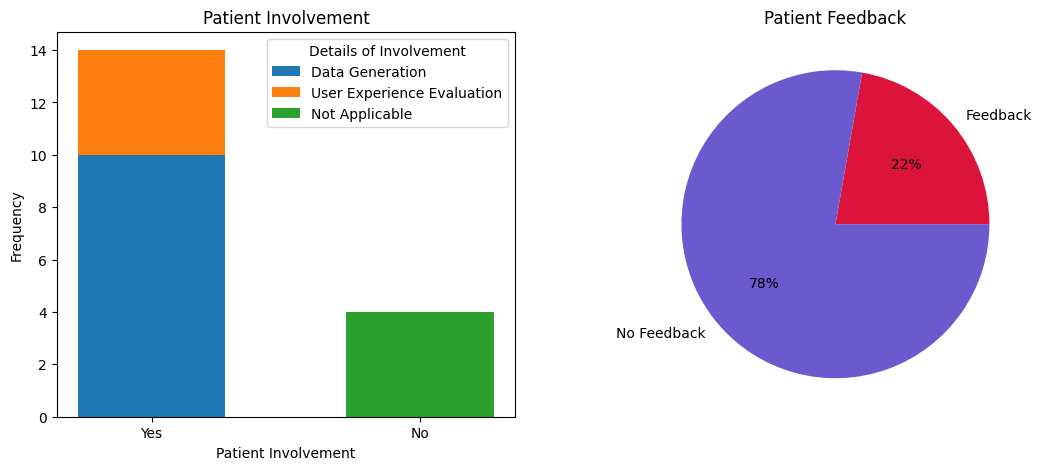

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# ---- first plot ----
labels = ['Yes', 'No']
single_value = [patient_involvement['No']]
divided_value = [involved_patients_details['database'], involved_patients_details['user experience evaluation']]

bar_width = 0.55
index = range(len(labels))

# plot divided value
rects2 = axs[0].bar(index[0], divided_value[0], bar_width, label='Data Generation')
rects3 = axs[0].bar(index[0], divided_value[1], bar_width, bottom=divided_value[0], label='User Experience Evaluation')

# plot single value
rects1 = axs[0].bar(index[1], single_value[0], bar_width, label='Not Applicable')
# create rest of details 
axs[0].set_xlabel('Patient Involvement')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Patient Involvement')
axs[0].set_xticks(index)
axs[0].set_xticklabels(labels)
axs[0].legend(title = "Details of Involvement")

# ---- second plot ----
axs[1].pie(patient_feedback.values(), labels=patient_feedback.keys(), autopct='%1.0f%%', colors=['crimson', 'slateblue'])
axs[1].set_title('Patient Feedback')

plt.savefig("./graphs/patientInvolvementBarAndPieCharts.png", bbox_inches='tight')
# show plot
plt.show();

In [32]:
# health professional involvement
health_involvement = dict(Counter(remove_and(parsifal_df['Health Professional Involvement'])))
health_involvement = dict(sorted(health_involvement.items(), key=lambda item: item[1], reverse=True))
print('Health Professional Involvement: ', health_involvement)

# how were health professionals involved?
involved_health_details = dict(Counter(remove_and(parsifal_df['Health Professional Involvement Details'])))
involved_health_details['Database Generation'] = involved_health_details['Database']
del involved_health_details['Database']
del involved_health_details['Not Discussed']
involved_health_details = dict(sorted(involved_health_details.items(), key=lambda item: item[1], reverse=False))
print('Health Professional Involvement Details: ', involved_health_details)

Health Professional Involvement:  {'Yes': 11, 'No': 7}
Health Professional Involvement Details:  {'Development': 1, 'Validation': 1, 'Test Environment Arrangement': 2, 'Database Generation': 2, 'User Experience Evaluation': 3, 'Participant Selection': 7}


{'Yes': 11, 'No': 7}


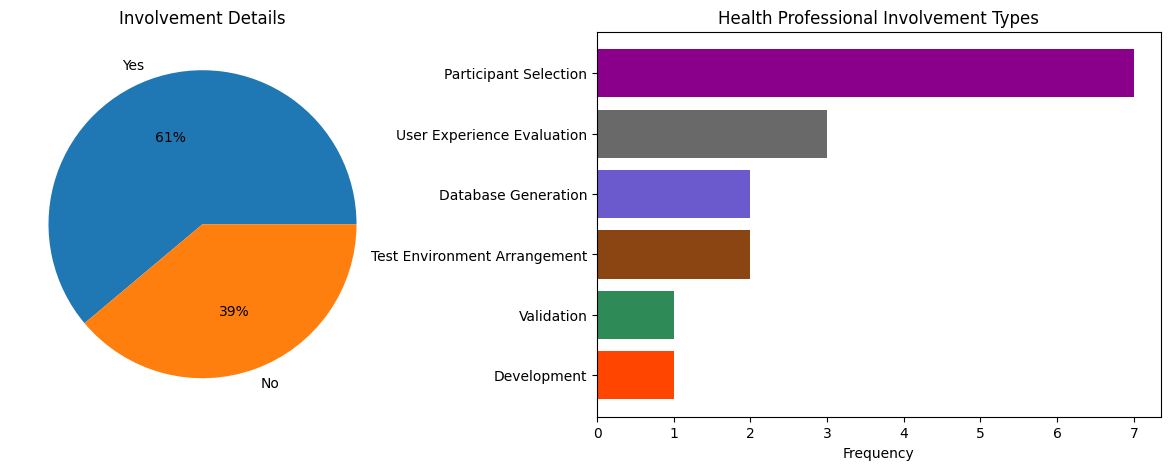

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# ---- first plot ----
print(health_involvement)
axs[0].pie(health_involvement.values(), labels=health_involvement.keys(), autopct='%1.0f%%')
axs[0].set_title('Involvement Details')



axs[1].barh(list(involved_health_details.keys()), involved_health_details.values(), color=['orangered', 'seagreen', "saddlebrown", 'slateblue', "dimgrey", "darkmagenta",  "black", 'royalblue'])
# plt.xticks(rotation = 90)
axs[1].set_xlabel('Frequency')
axs[1].set_title('Health Professional Involvement Types')
plt.savefig("./graphs/healthProfessionalInvolvementPieAndBarCharts.png", bbox_inches='tight')
plt.show();